In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import optuna
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, 
                              BaggingClassifier, StackingClassifier, VotingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [5]:
train = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv",index_col=[0])
test = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv",index_col=[0])

In [6]:
X = train.drop("Target",axis=1)
y = train["Target"]

In [7]:
train.shape

(76518, 37)

In [8]:
train.isnull().sum().to_frame()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [9]:
test.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.00000,51012.000000,51012.000000,...,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000,51012.000000
mean,1.109092,16.067102,1.648161,9026.304556,0.918313,3.635007,132.328001,1.20009,19.913275,23.535462,...,0.057810,0.129283,5.944131,7.274092,4.039697,9.709128,0.063809,11.520611,1.228719,-0.086477
std,0.438084,16.654196,1.235666,1751.328311,0.273889,8.577250,10.885679,3.26473,15.383823,14.877455,...,0.403434,0.877250,1.599746,3.433149,2.749871,5.496810,0.467176,2.651113,1.402773,2.251650
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.00000,1.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.00000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.166667,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,139.000000,1.00000,37.000000,37.000000,...,0.000000,0.000000,6.000000,9.000000,6.000000,13.250000,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.00000,44.000000,43.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,17.714286,10.000000,16.200000,3.700000,3.510000


In [10]:
train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [11]:
test.nunique()

Marital status                                       6
Application mode                                    20
Application order                                    8
Course                                              21
Daytime/evening attendance                           2
Previous qualification                              20
Previous qualification (grade)                     108
Nacionality                                         18
Mother's qualification                              32
Father's qualification                              36
Mother's occupation                                 38
Father's occupation                                 49
Admission grade                                    653
Displaced                                            2
Educational special needs                            2
Debtor                                               2
Tuition fees up to date                              2
Gender                                               2
Scholarshi

In [12]:
train.nunique().to_frame()

,0
Marital status,6
Application mode,22
Application order,8
Course,19
Daytime/evening attendance,2
Previous qualification,21
Previous qualification (grade),110
Nacionality,18
Mother's qualification,35
Father's qualification,39


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76518 entries, 0 to 76517
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  76518 non-null  int64  
 1   Application mode                                76518 non-null  int64  
 2   Application order                               76518 non-null  int64  
 3   Course                                          76518 non-null  int64  
 4   Daytime/evening attendance                      76518 non-null  int64  
 5   Previous qualification                          76518 non-null  int64  
 6   Previous qualification (grade)                  76518 non-null  float64
 7   Nacionality                                     76518 non-null  int64  
 8   Mother's qualification                          76518 non-null  int64  
 9   Father's qualification                      

In [14]:
binary_features = [col for col in train.columns if train[col].nunique() == 2]
categorical_features = [col for col in train.columns if train[col].nunique() > 2 and train[col].nunique() <= 12]
long_categorical_features = [col for col in train.columns if train[col].nunique() >12 and train[col].nunique() <= 56]
continuous_features = [col for col in train.columns if train[col].nunique() > 56]

binary_features = [col for col in binary_features if col != 'Target']
categorical_features = [col for col in categorical_features if col != 'Target']
continuous_features = [col for col in continuous_features if col != 'Target']
long_categorical_features = [col for col in long_categorical_features if col != 'Target']

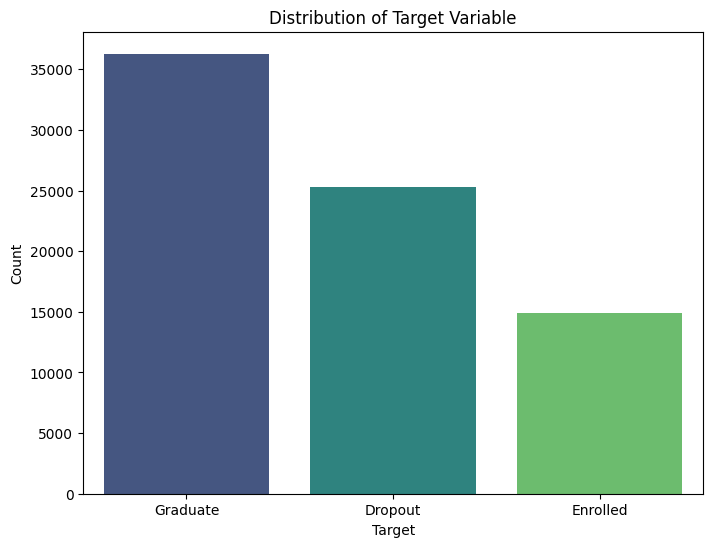

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Target', palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

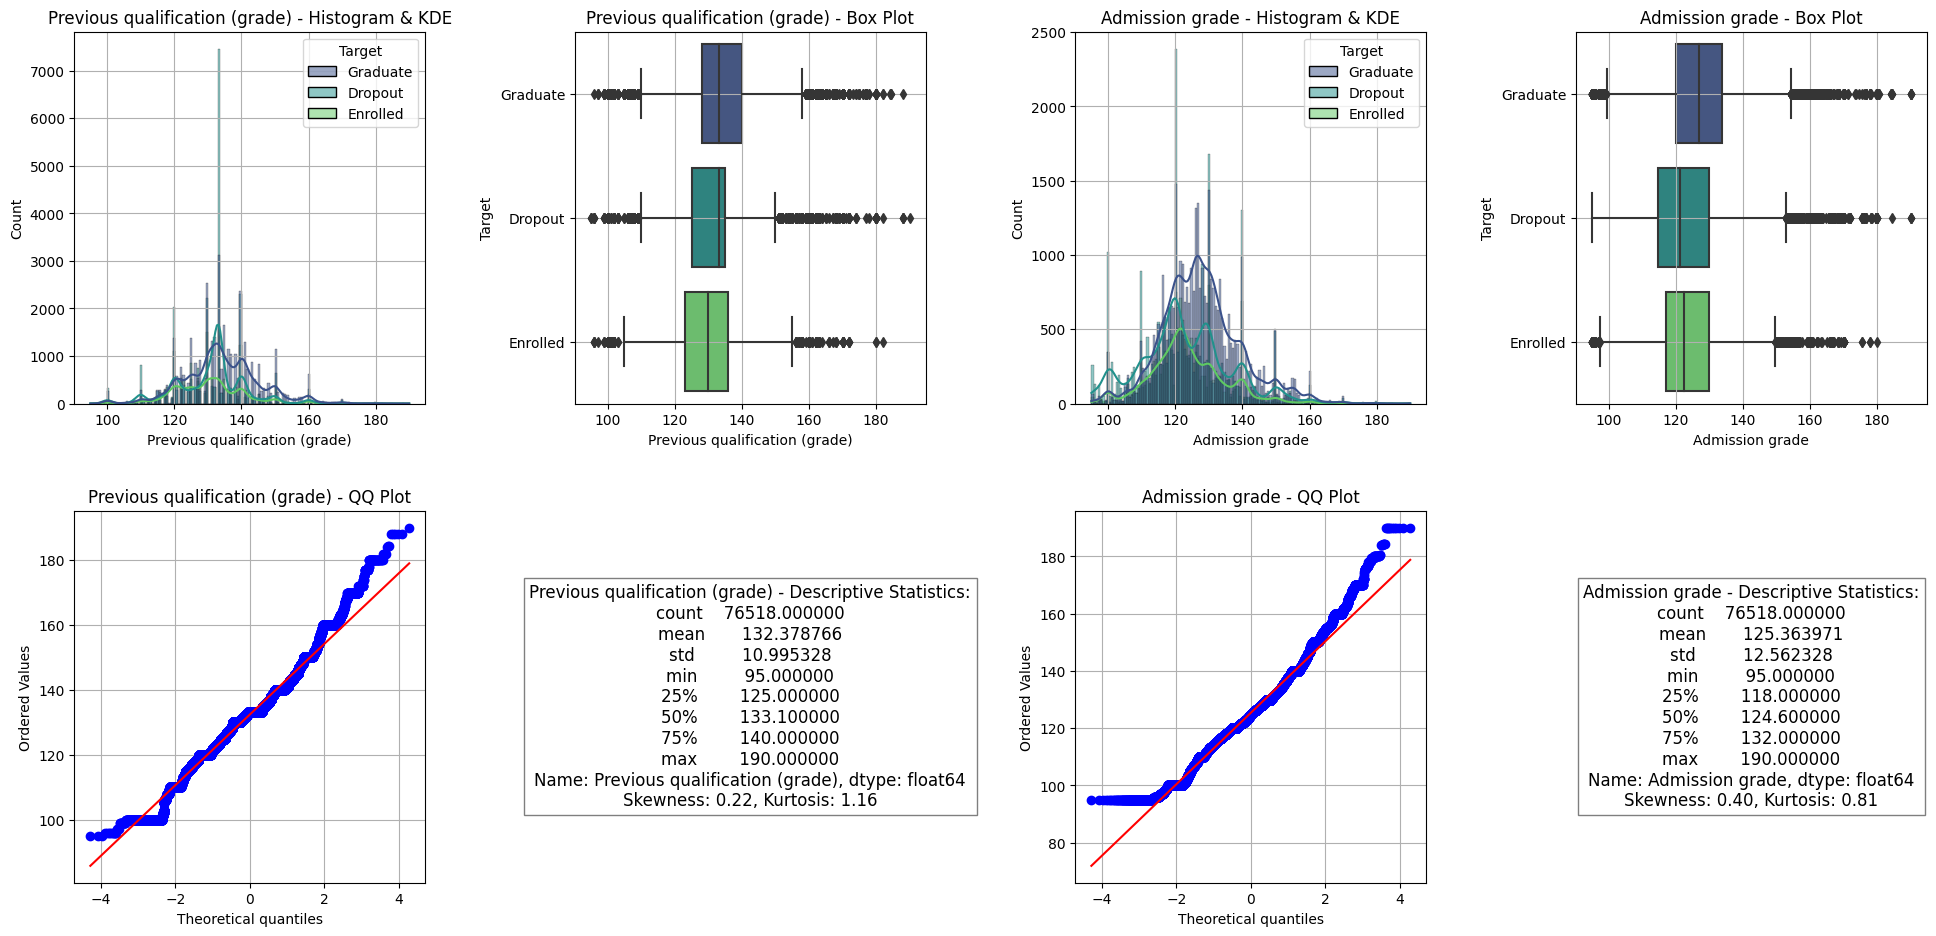

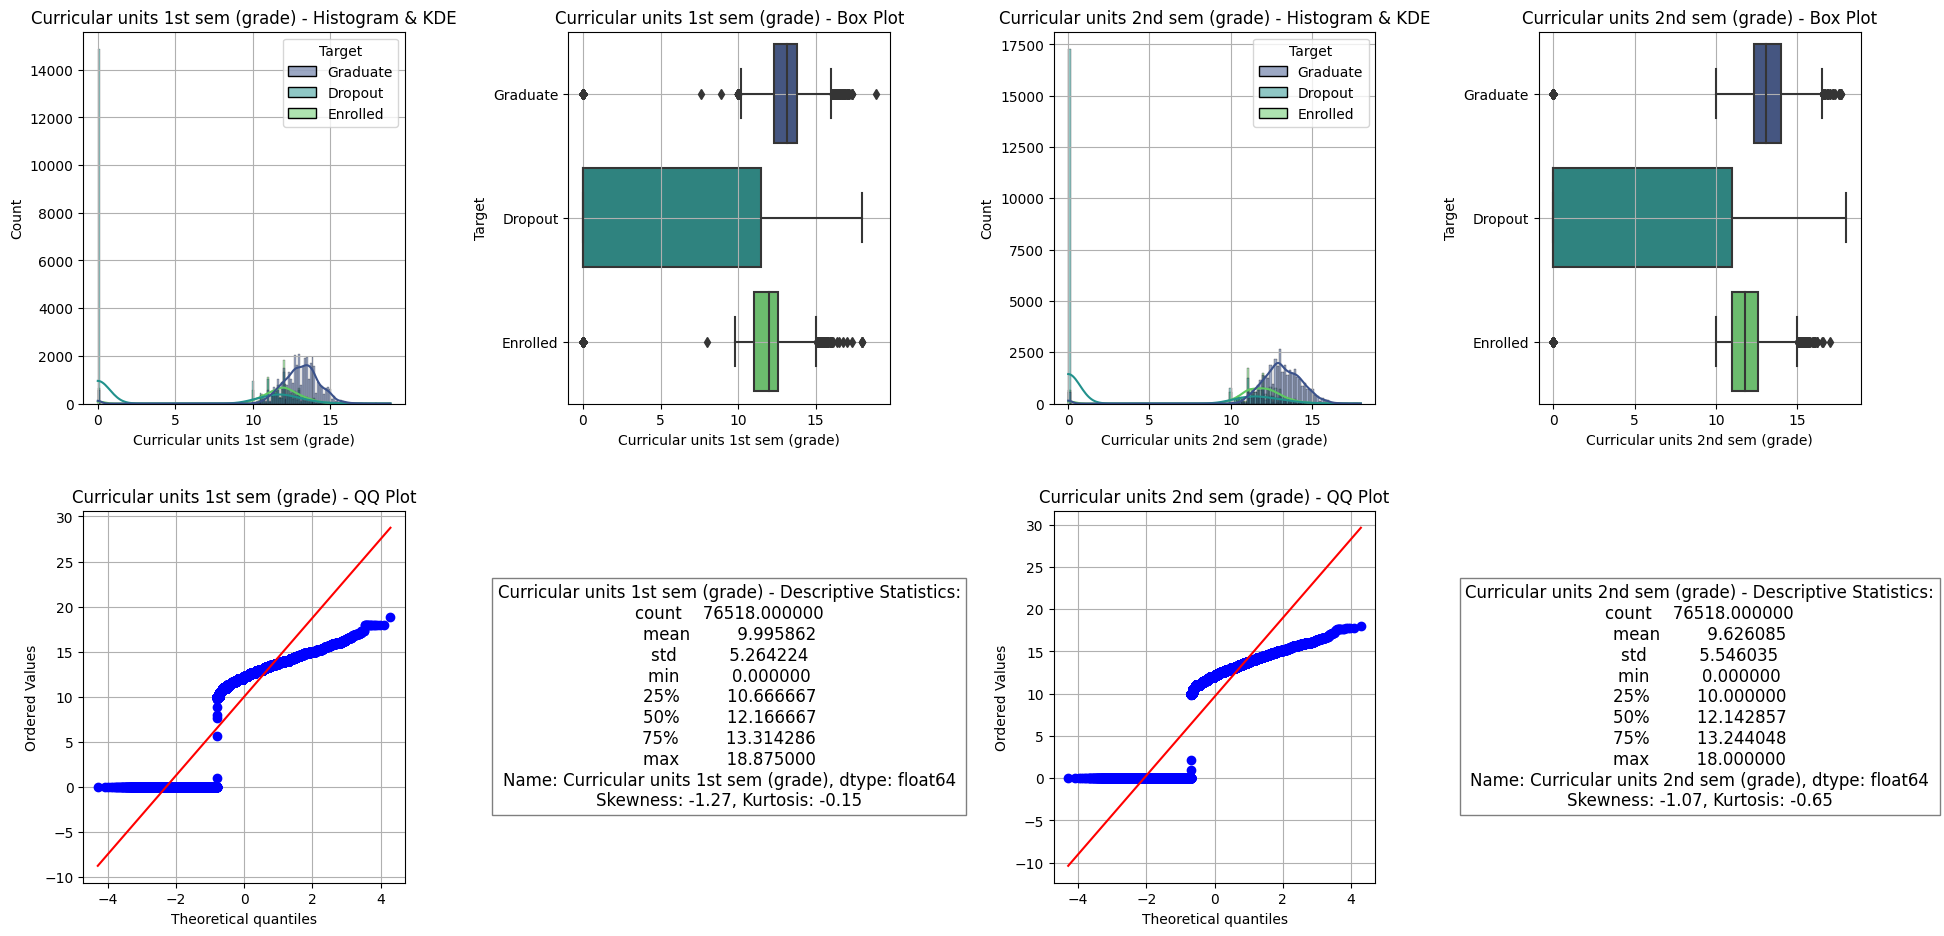

In [16]:
import warnings
def plot_continuous_distribution(df, features, target):
    num_features = len(features)

    for i in range(0, num_features, 2):
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))

        for j in range(2):
            if i + j < num_features:
                feature = features[i + j]

                # Suppress the FutureWarning
                with warnings.catch_warnings():
                    warnings.simplefilter(action='ignore', category=FutureWarning)

                    # Histogram and KDE
                    sns.histplot(df, x=feature, hue=target, kde=True, ax=axes[0, j*2], palette='viridis')
                    axes[0, j*2].set_title(f'{feature} - Histogram & KDE')
                    axes[0, j*2].grid(True)

                    # Box Plot
                    sns.boxplot(x=feature, y=target, data=df, ax=axes[0, j*2+1], palette='viridis')
                    axes[0, j*2+1].set_title(f'{feature} - Box Plot')
                    axes[0, j*2+1].grid(True)

                # QQ Plot
                stats.probplot(df[feature], dist="norm", plot=axes[1, j*2])
                axes[1, j*2].get_lines()[1].set_color('red')
                axes[1, j*2].set_title(f'{feature} - QQ Plot')
                axes[1, j*2].grid(True)

                # Descriptive Statistics
                desc_stats = df[feature].describe()
                skewness = df[feature].skew()
                kurtosis = df[feature].kurt()
                stats_text = (f'{feature} - Descriptive Statistics:\n{desc_stats}\n'
                              f'Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')
                axes[1, j*2+1].text(0.5, 0.5, stats_text, ha='center', va='center', fontsize=12,
                                    transform=axes[1, j*2+1].transAxes, bbox=dict(facecolor='white', alpha=0.5))
                axes[1, j*2+1].axis('off')
            else:
                for k in range(2):
                    axes[0, j*2+k].axis('off')
                    axes[1, j*2+k].axis('off')

        plt.tight_layout(pad=3.0)
        plt.show()

plot_continuous_distribution(train, continuous_features, 'Target')

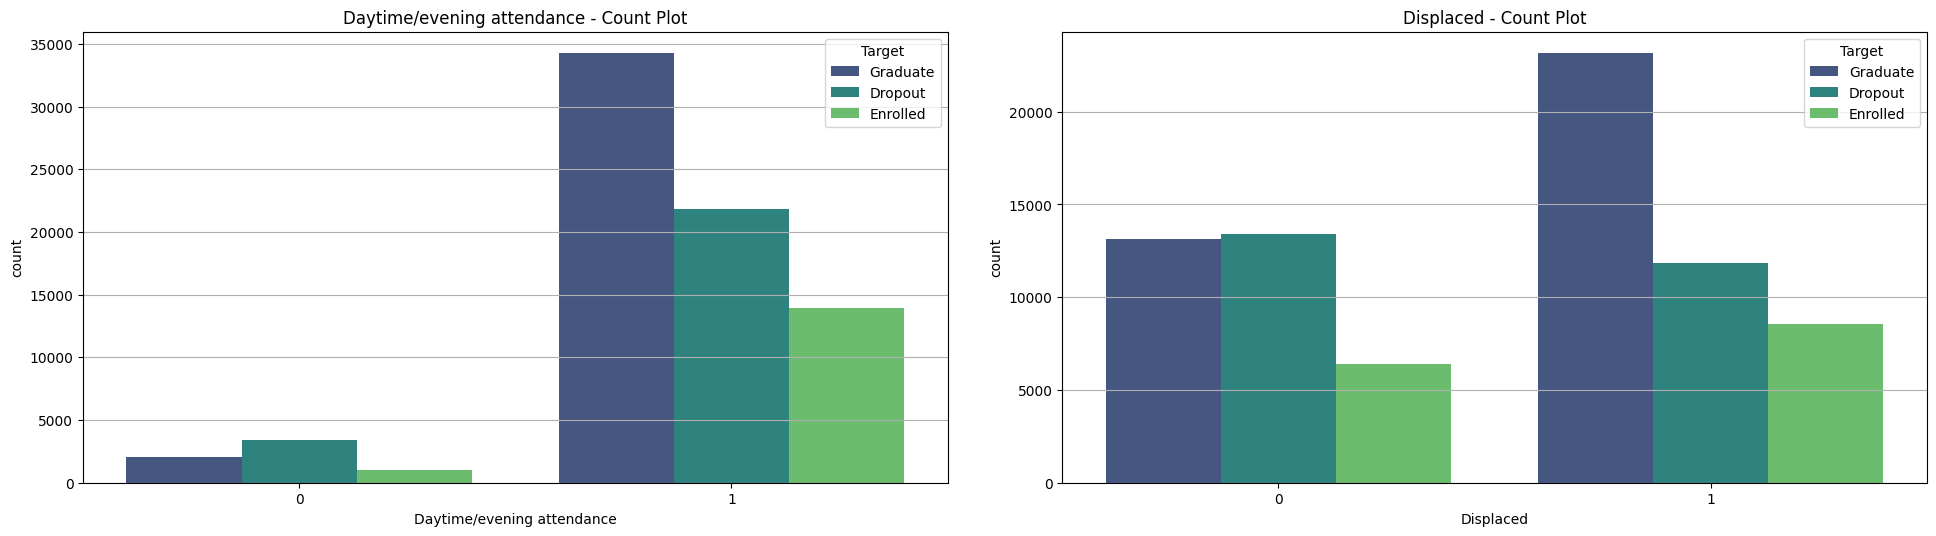

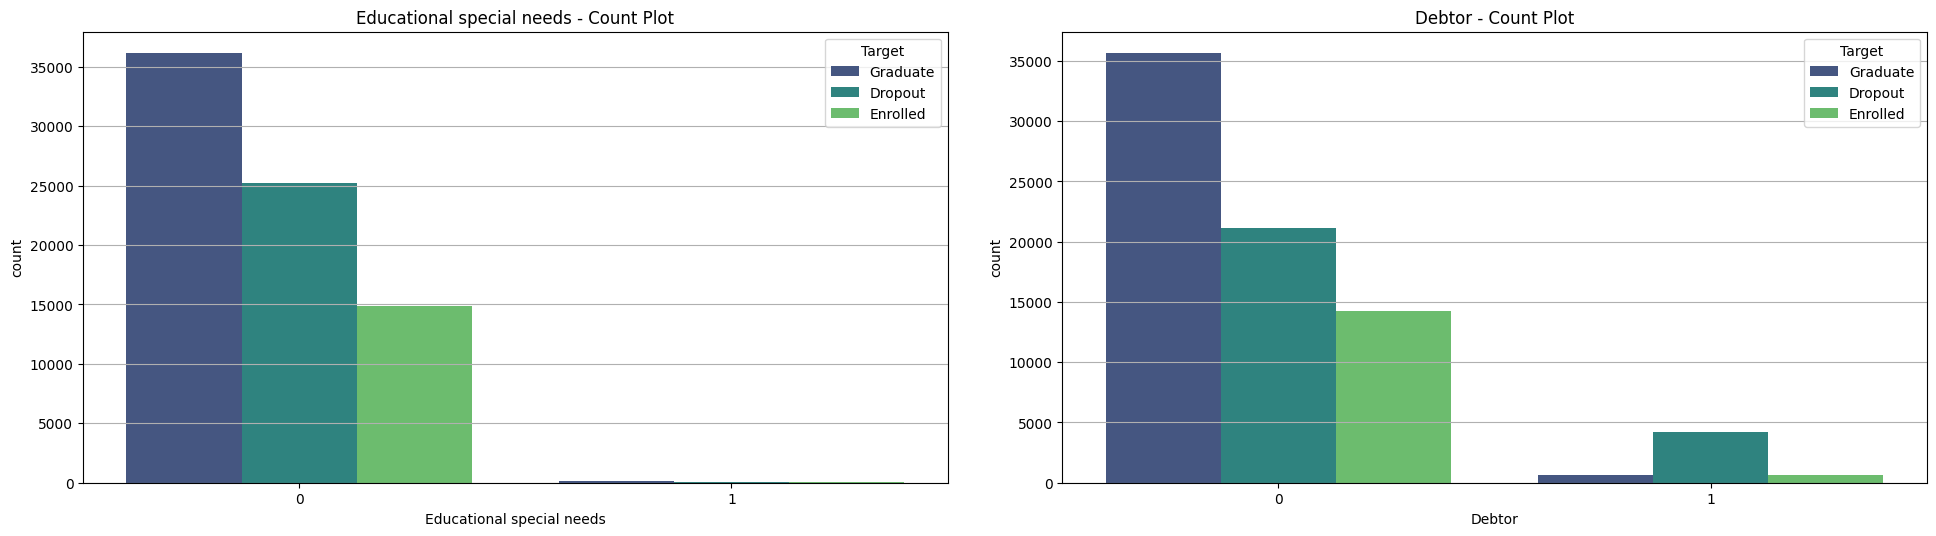

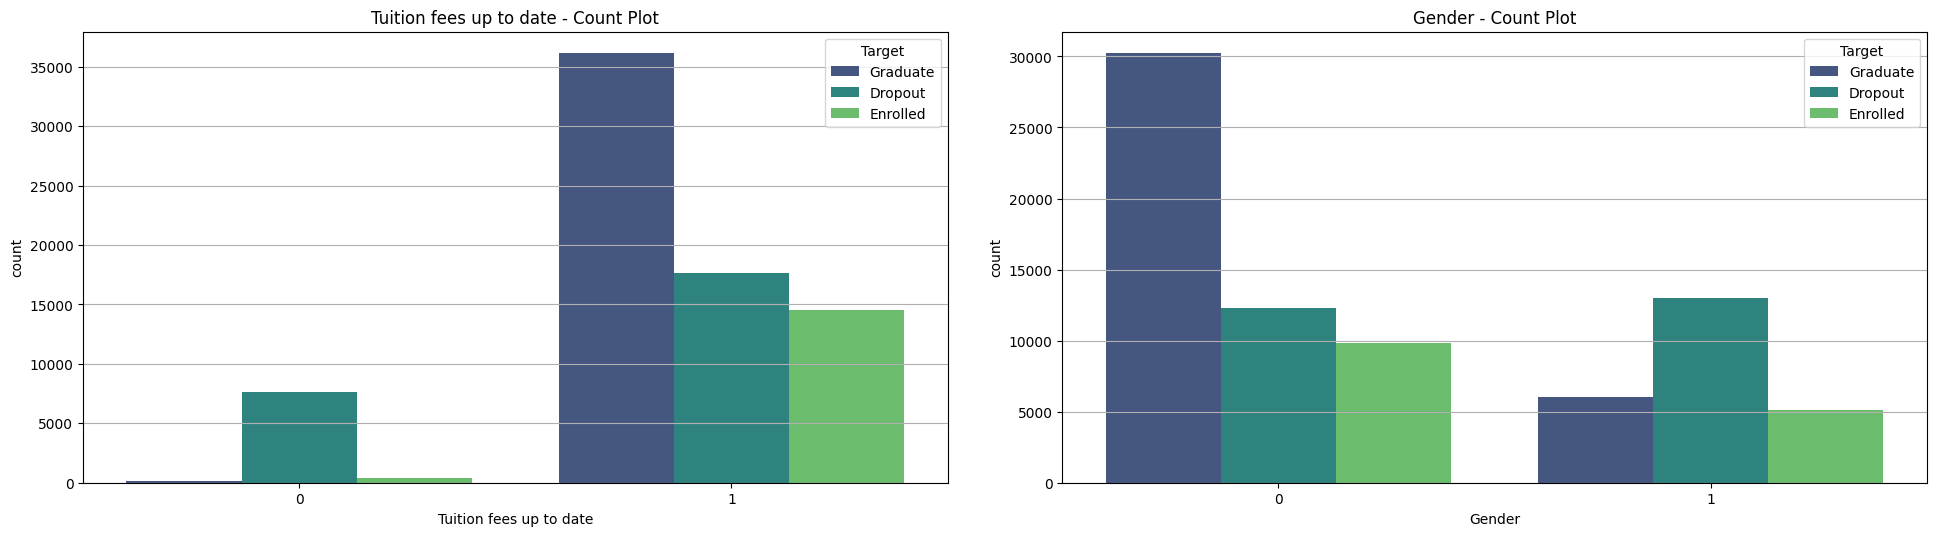

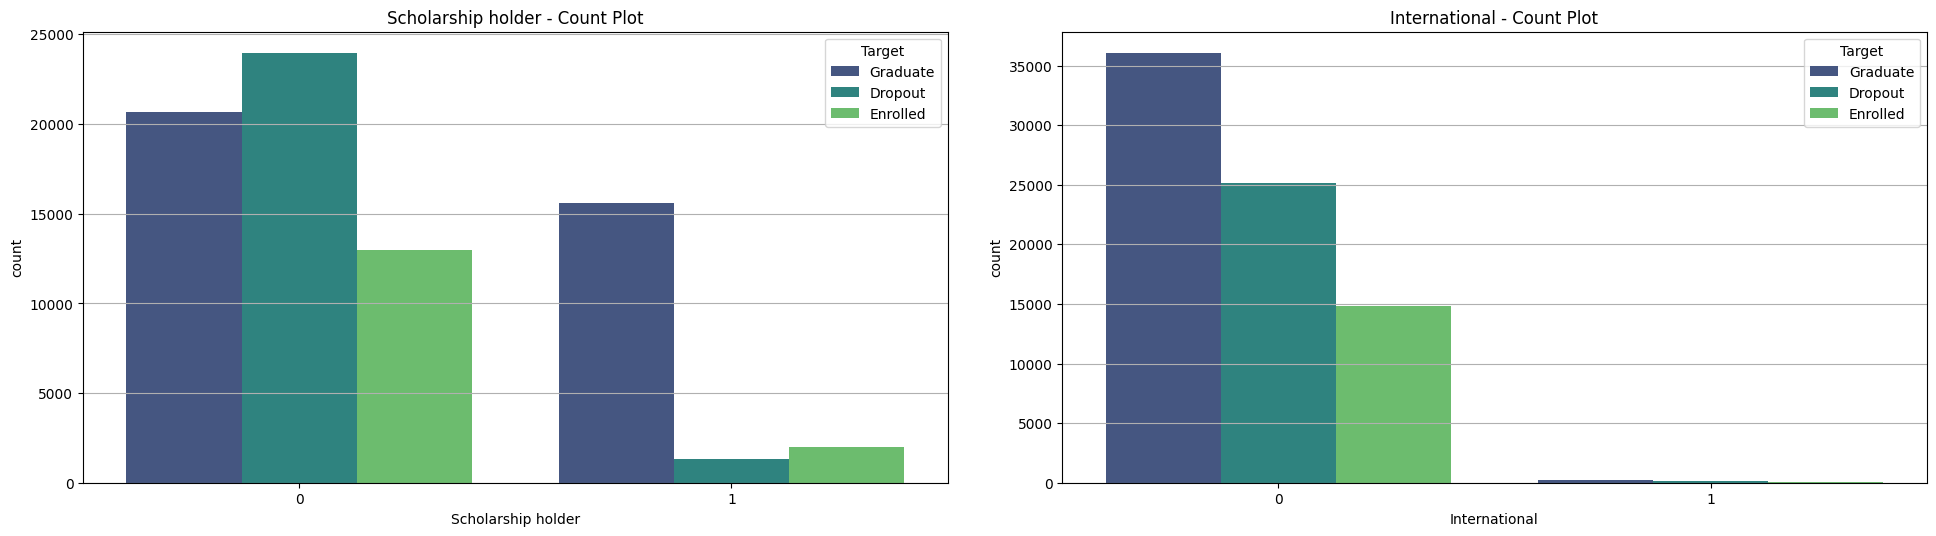

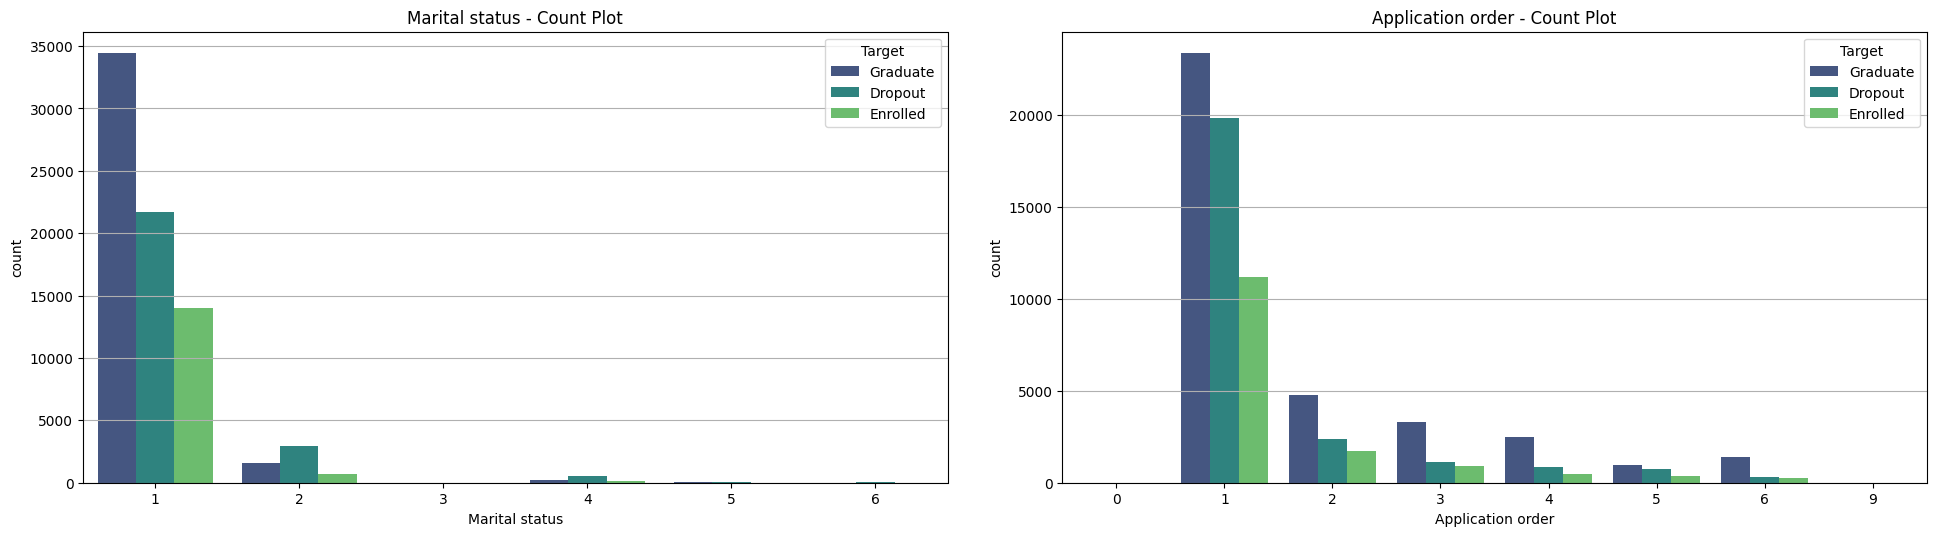

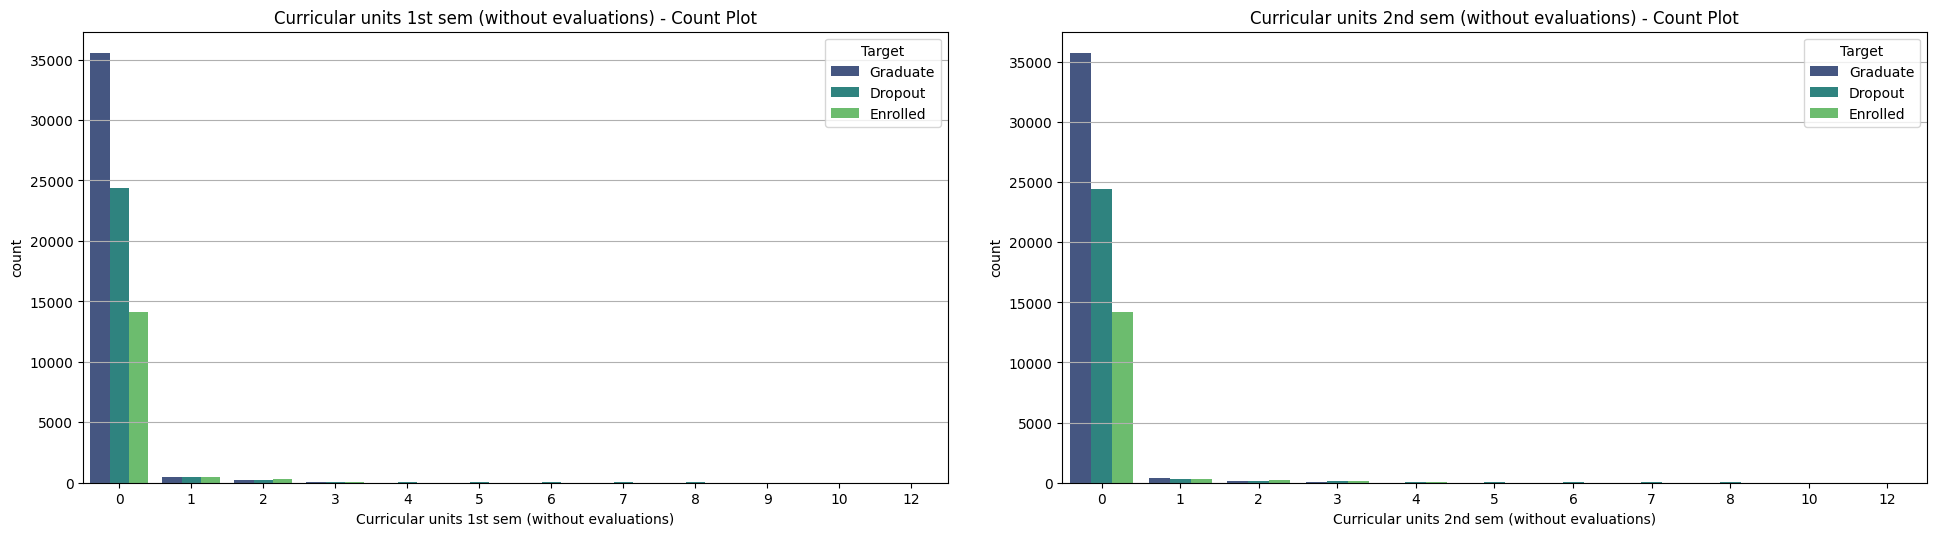

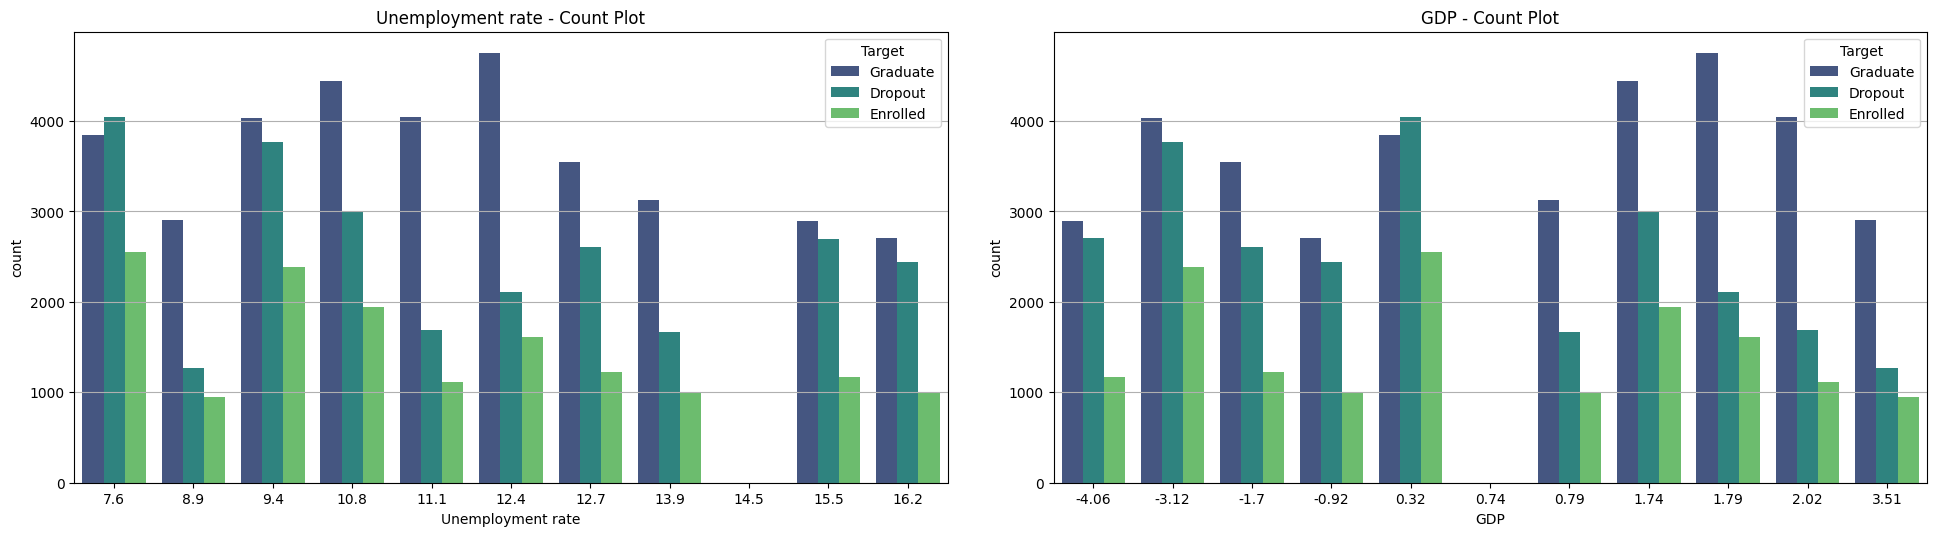

In [17]:
def plot_categorical_distribution(df, features, target):
    num_features = len(features)
    
    for i in range(0, num_features, 2):
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        
        for j in range(2):
            if i + j < num_features:
                feature = features[i + j]
                
                # Bar Plot with hue
                sns.countplot(x=df[feature], hue=target, data=df, palette='viridis', ax=axes[j])
                axes[j].set_title(f'{feature} - Count Plot')
                axes[j].grid(True, axis='y')
            else:
                axes[j].axis('off')

        plt.tight_layout(pad=3.0)
        plt.show()
        
    
plot_categorical_distribution(train, binary_features, "Target")
plot_categorical_distribution(train, categorical_features, "Target")

In [18]:
long_categorical_features

['Application mode',
 'Course',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Inflation rate']

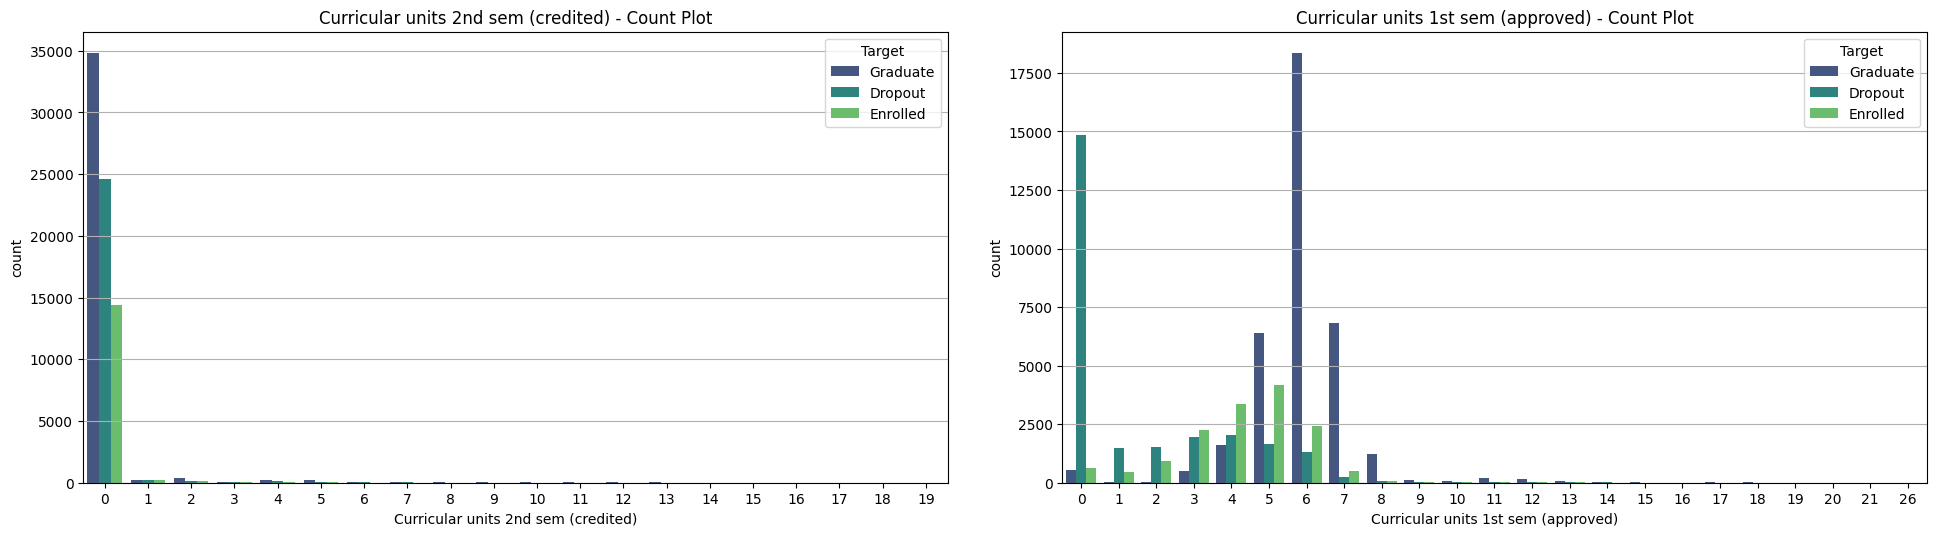

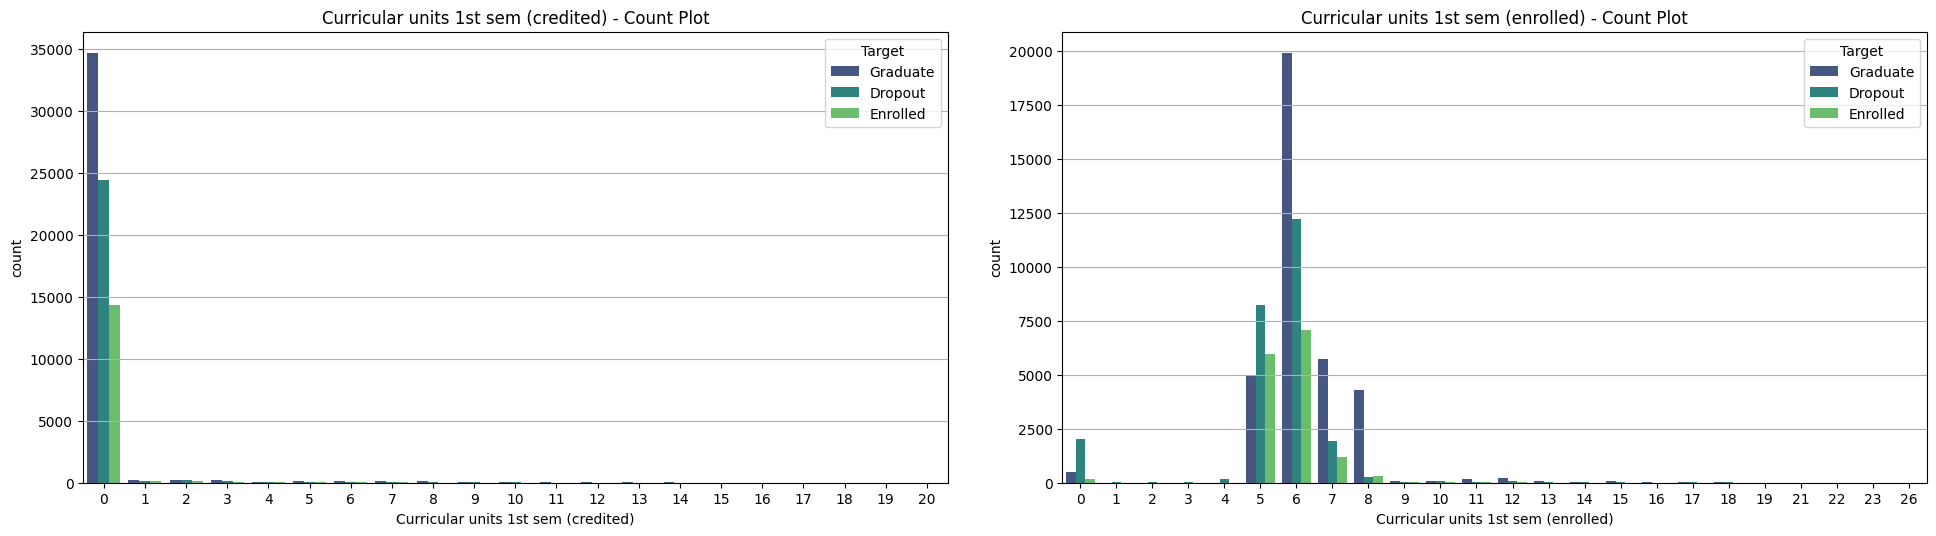

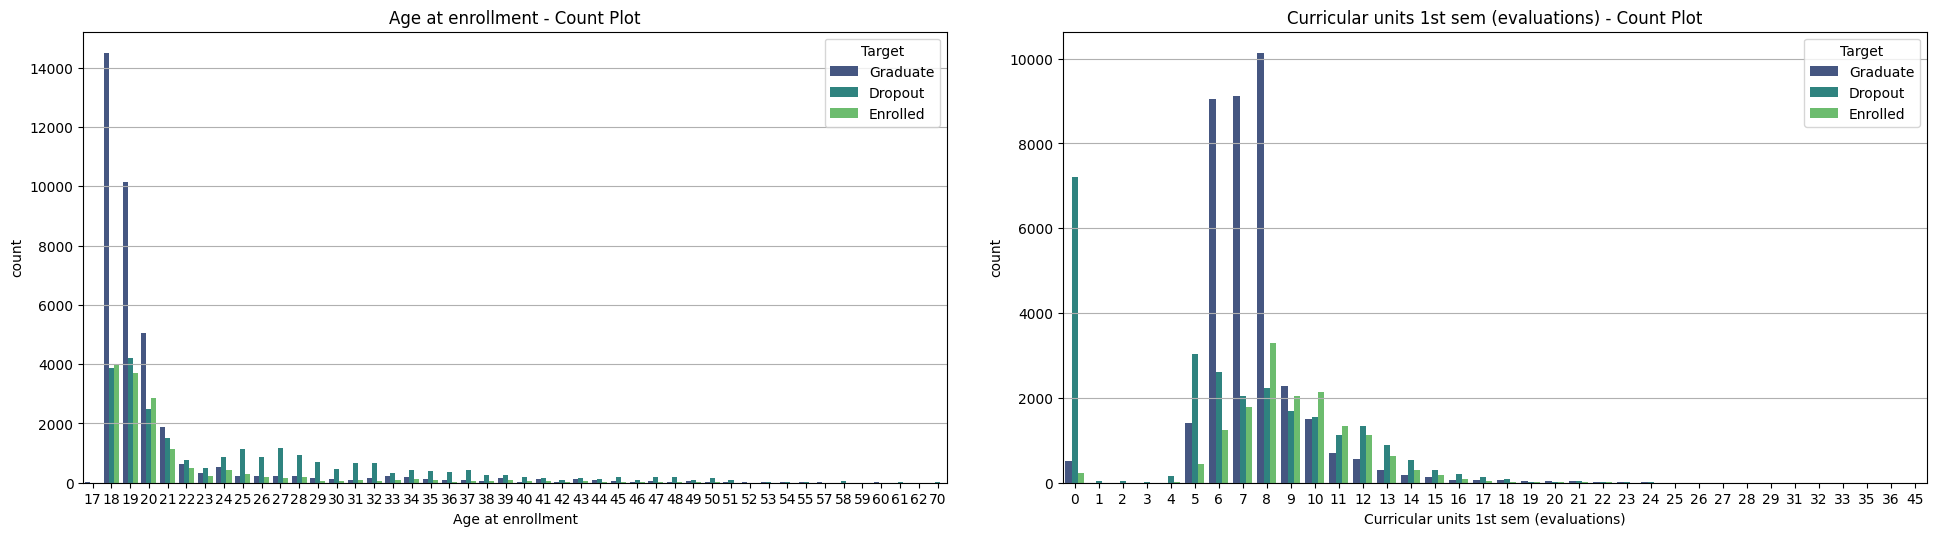

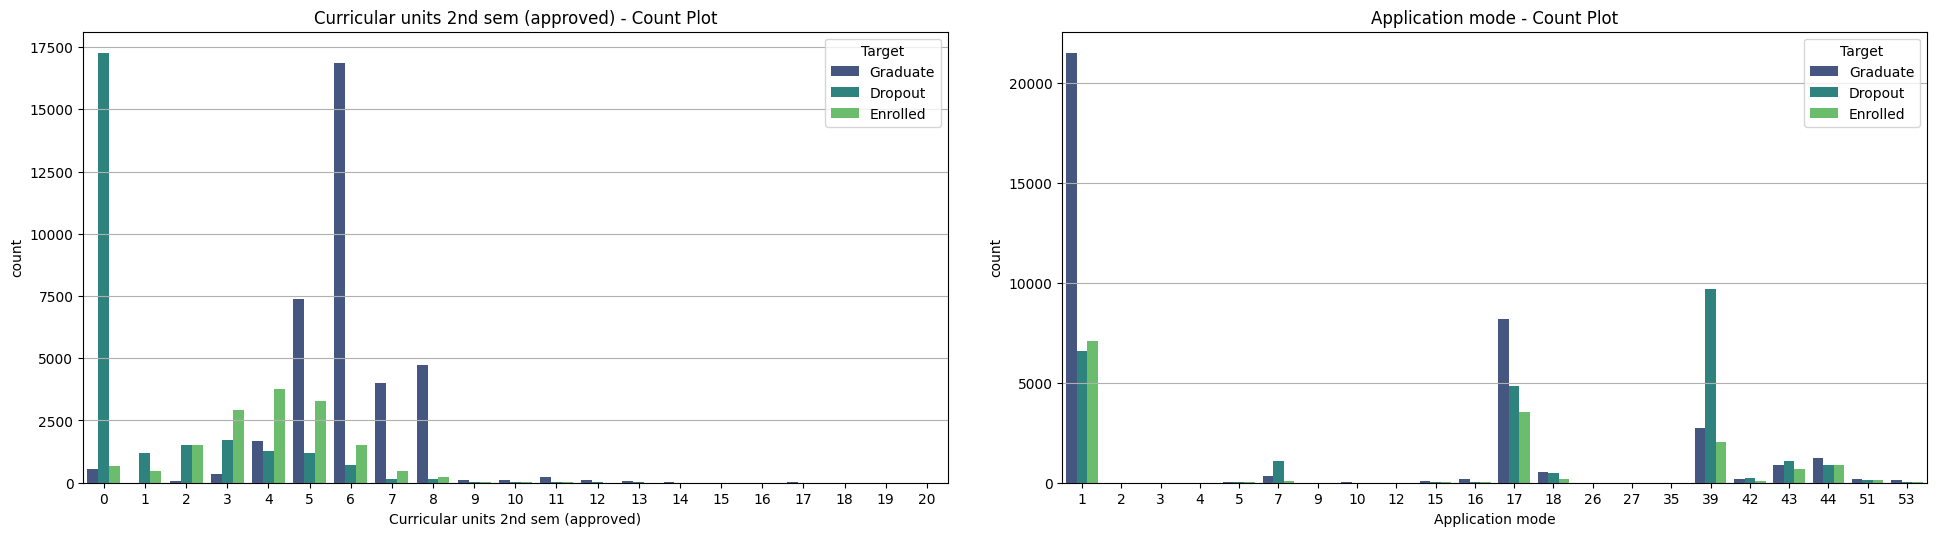

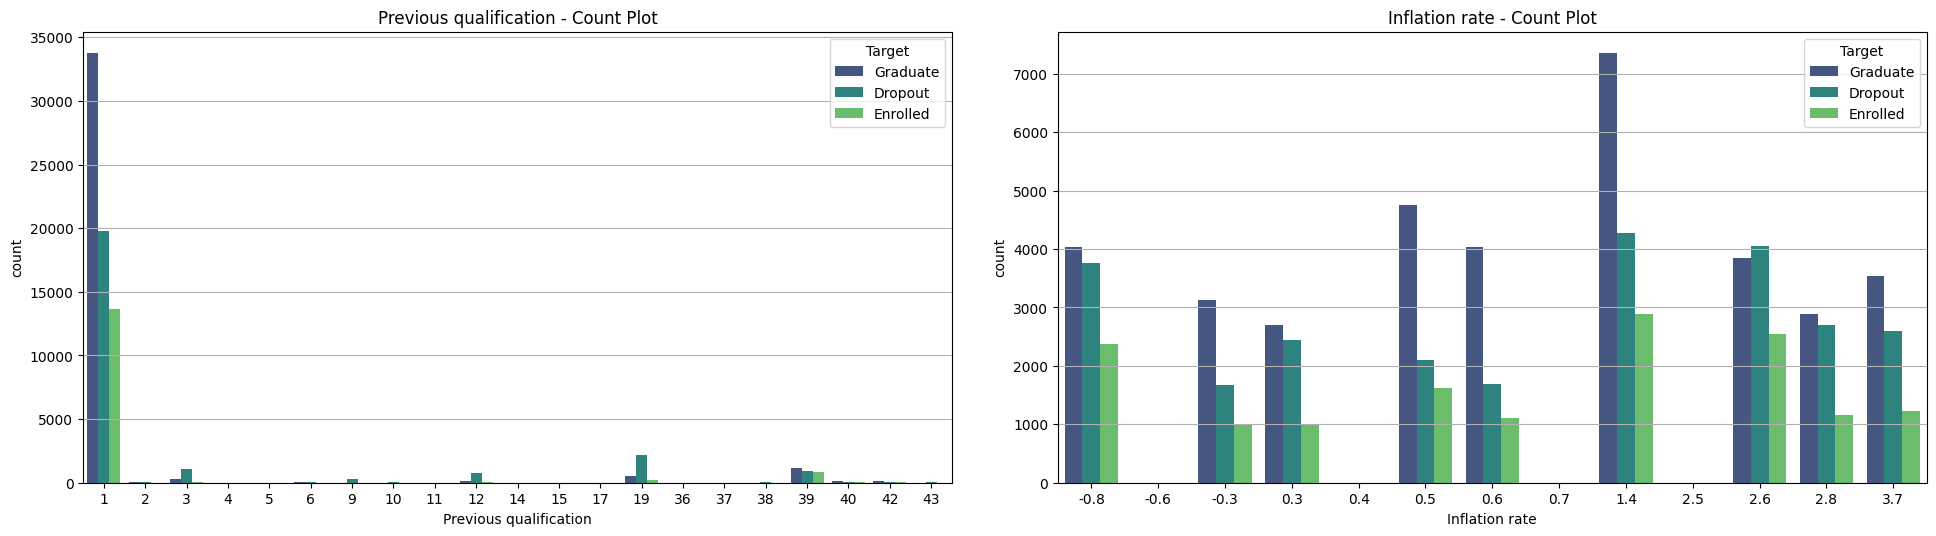

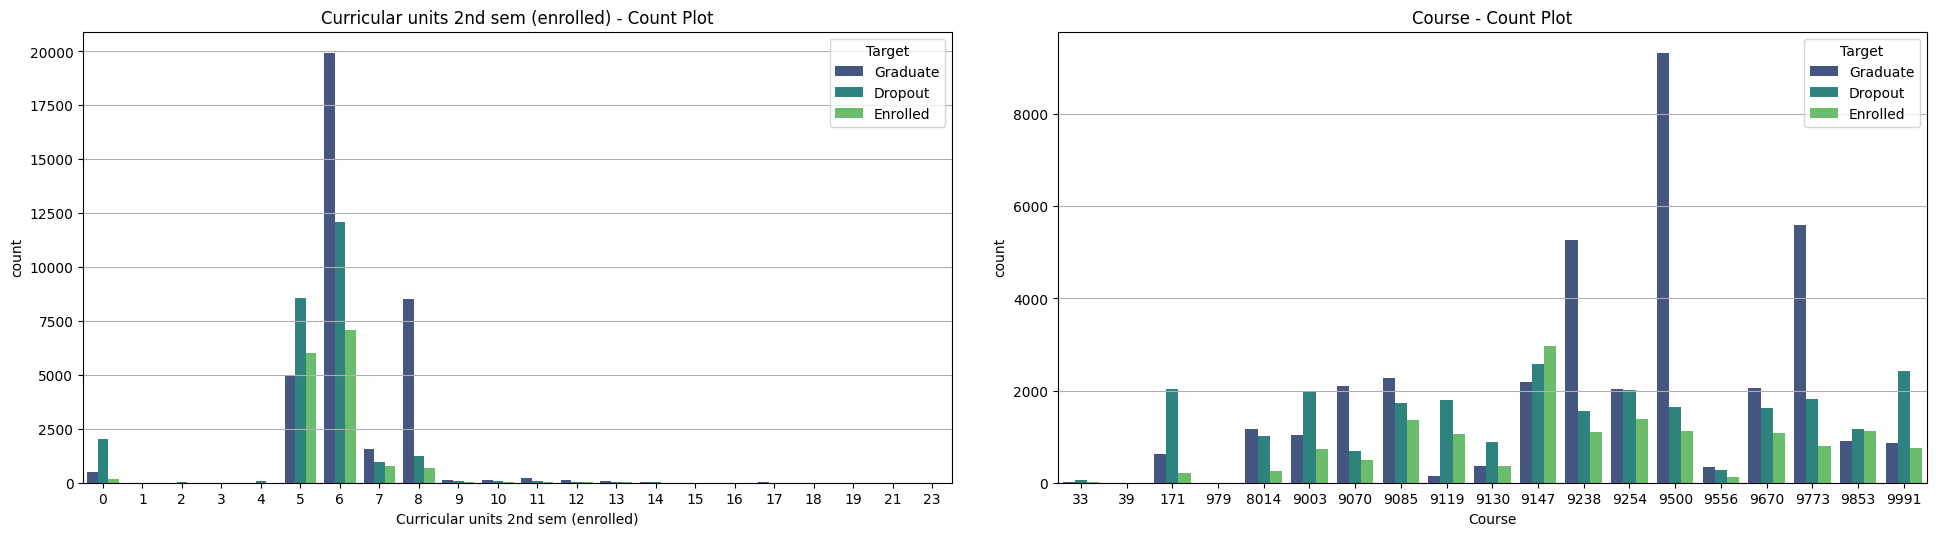

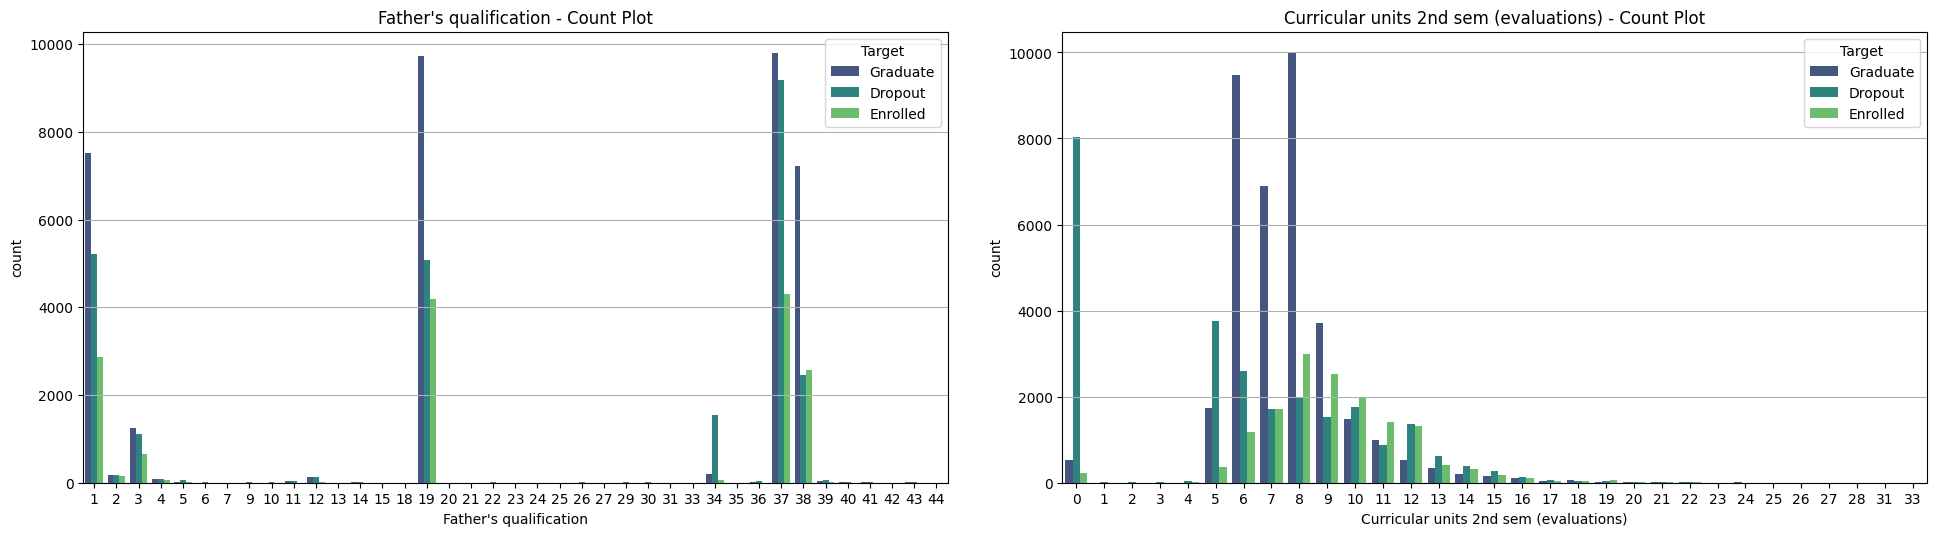

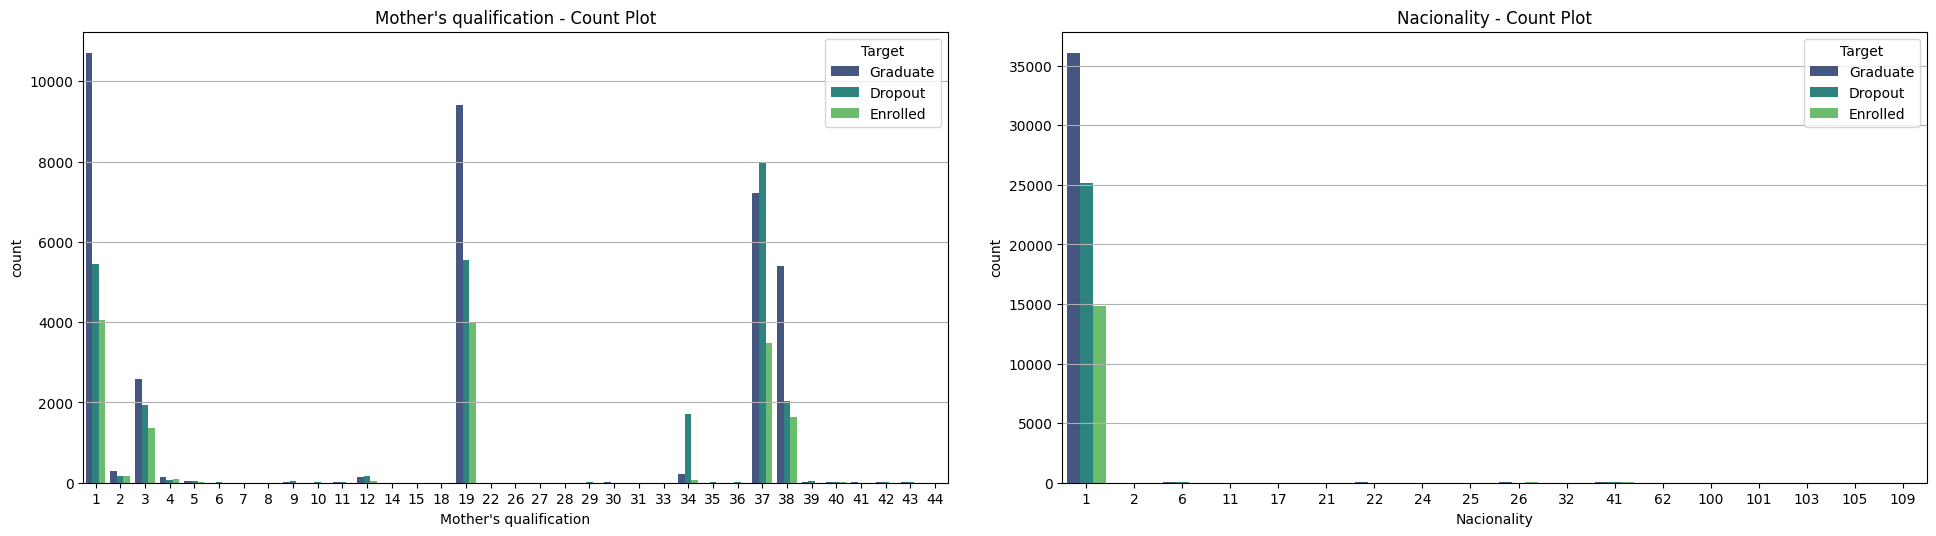

In [19]:
def plot_long_categorical_distribution(df, features, target):
    num_features = len(features)
    
    for i in range(0, num_features, 2):
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))
        
        for j in range(2):
            if i + j < num_features:
                feature = features[i + j]
                
                # Bar Plot with hue
                sns.countplot(x=df[feature], hue=target, data=df, palette='viridis', ax=axes[j])
                axes[j].set_title(f'{feature} - Count Plot')
                axes[j].grid(True, axis='y')
            else:
                axes[j].axis('off')

        plt.tight_layout(pad=3.0)
        plt.show()

longer_cats = ["Father's occupation", "Mother's occupation"]
long_categorical_features = list(set(long_categorical_features) - set(longer_cats))
plot_long_categorical_distribution(train, long_categorical_features, 'Target')

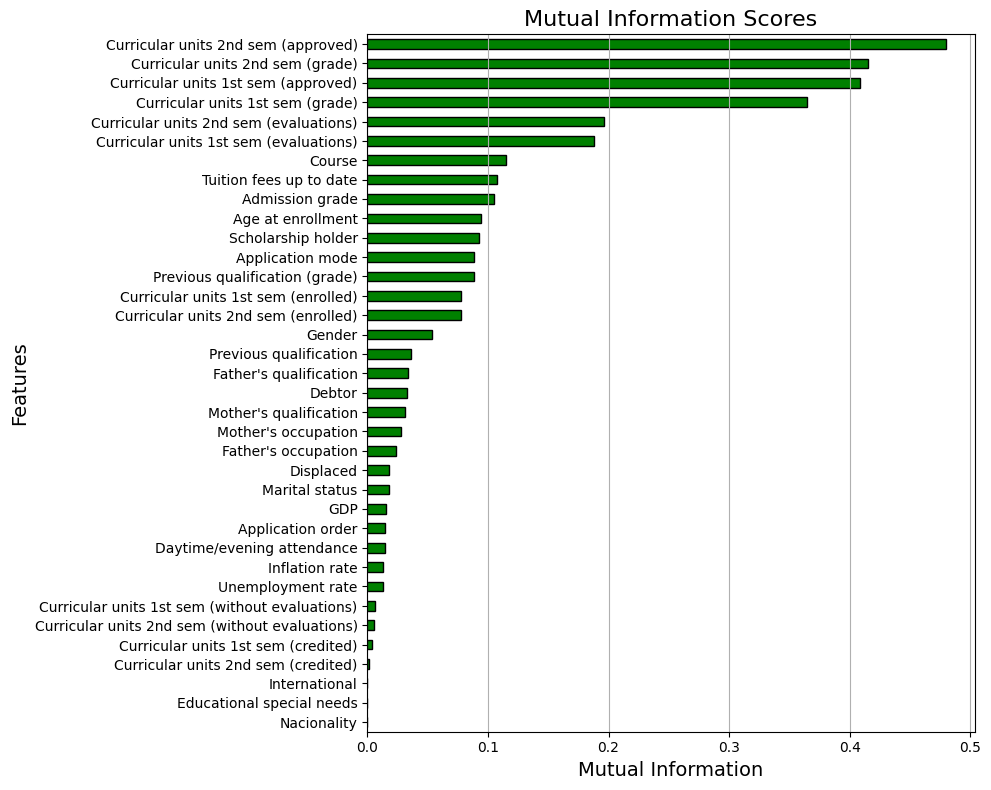

In [20]:
def mutual_info_classifier(X, y, n_features):
    """
    Calculate mutual information between each feature and the target variable.

    Parameters:
    X (DataFrame): Feature dataset
    y (Series): Target variable
    n_features (int): Number of top features to select

    Returns:
    DataFrame: Top n_features with highest mutual information scores
    """
    mi = mutual_info_classif(X, y, discrete_features='auto')
    mi = pd.Series(mi, index=X.columns)
    mi = mi.sort_values(ascending=False)
    
    return mi.head(n_features)

def plot_mutual_info(mi_scores):
    """
    Plot the mutual information scores.

    Parameters:
    mi_scores (Series): Mutual information scores
    """
    plt.figure(figsize=(10, 8))
    ax = mi_scores.sort_values(ascending=True).plot(kind='barh', color='green', edgecolor='black')
    ax.set_title('Mutual Information Scores', fontsize=16)
    ax.set_xlabel('Mutual Information', fontsize=14)
    ax.set_ylabel('Features', fontsize=14)
    ax.xaxis.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
mi_scores = mutual_info_classifier(X, y, 36)
plot_mutual_info(mi_scores)

In [21]:
scaler = RobustScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

In [22]:
X[continuous_features]

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
id,,,,
0,-0.473333,-0.142857,0.881295,0.088073
1,-0.540000,-0.342857,-0.214029,-3.743119
2,0.260000,1.435714,-4.595324,-3.743119
3,-0.140000,0.107143,0.160364,0.208734
4,-0.073333,-0.321429,0.289568,0.243670
...,...,...,...,...
76513,-0.806667,-0.578571,-0.566547,-0.475596
76514,-0.540000,0.500000,0.314748,0.533945
76515,0.326667,-0.092857,0.125899,-0.228991


## **OPTIONAL - (OUTLIER REMOVAL)**

In [23]:
# iso_forest = IsolationForest(contamination=0.01,random_state=42)
# outliers = iso_forest.fit_predict(X)

# outliers = pd.Series(outliers, index=train.index)
# train_cleaned = train[outliers == 1]
# X_cleaned = train_cleaned.drop(columns=["Target"])
# y_cleaned = train_cleaned["Target"]

## **High performance models taken for optuna by cross validation**

In [24]:

# models = {
#     "RandomForest": RandomForestClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "GradientBoosting": GradientBoostingClassifier(),
#     "ExtraTrees": ExtraTreesClassifier(),
#     "LightGBM": LGBMClassifier(),
#     "CatBoost": CatBoostClassifier(verbose=0),
# }

# # KFold cross-validation
# kf = KFold(n_splits=3, shuffle=True, random_state=1)

# # Dictionary to store results
# results = {}

# # Evaluate each model
# for name, model in models.items():
#     cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy',n_jobs=-1)
#     results[name] = cv_results
#     print(f"{name} - Accuracy: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

# # Display summary of results
# results_df = pd.DataFrame(results).T
# results_df.columns = ['Fold 1', 'Fold 2', 'Fold 3']
# results_df['Mean Accuracy'] = results_df.mean(axis=1)
# results_df['Std Dev'] = results_df.std(axis=1)

# print("\nSummary of results:")
# print(results_df)

## **OPTUNA**

In [25]:
def objective_random_forest(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }
    model = RandomForestClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_gradient_boosting(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
        'max_features': trial.suggest_categorical('max_features', [1.0, 'sqrt', 'log2'])
    }
    model = GradientBoostingClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_ada_boost(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    }
    model = AdaBoostClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_extra_trees(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
        'max_features': trial.suggest_categorical('max_features', [1.0, 'sqrt', 'log2'])
    }
    model = ExtraTreesClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_lgbm(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'num_leaves': trial.suggest_int('num_leaves', 31, 256),
        'max_depth': trial.suggest_int('max_depth', -1, 32),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0)
    }
    model = LGBMClassifier(**param)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

def objective_catboost(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 1, 16),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-8, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255)
    }
    model = CatBoostClassifier(**param, silent=True)
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    return cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1).mean()

# Define study and optimize for each model
# study_rf = optuna.create_study(direction='maximize')
# study_rf.optimize(objective_random_forest, n_trials=50, n_jobs=-1)
# print(f"Random Forest Best Params: {study_rf.best_params}, Best Score: {study_rf.best_value}")

# study_gb = optuna.create_study(direction='maximize')
# study_gb.optimize(objective_gradient_boosting, n_trials=50, n_jobs=-1)
# print(f"Gradient Boosting Best Params: {study_gb.best_params}, Best Score: {study_gb.best_value}")

# study_ab = optuna.create_study(direction='maximize')
# study_ab.optimize(objective_ada_boost, n_trials=50, n_jobs=-1)
# print(f"AdaBoost Best Params: {study_ab.best_params}, Best Score: {study_ab.best_value}")

# study_et = optuna.create_study(direction='maximize')
# study_et.optimize(objective_extra_trees, n_trials=50, n_jobs=-1)
# print(f"Extra Trees Best Params: {study_et.best_params}, Best Score: {study_et.best_value}")

# study_lgbm = optuna.create_study(direction='maximize')
# study_lgbm.optimize(objective_lgbm, n_trials=50, n_jobs=-1)
# print(f"LGBM Best Params: {study_lgbm.best_params}, Best Score: {study_lgbm.best_value}")

# study_catboost = optuna.create_study(direction='maximize')
# study_catboost.optimize(objective_catboost, n_trials=50, n_jobs=-1)
# print(f"CatBoost Best Params: {study_catboost.best_params}, Best Score: {study_catboost.best_value}")

In [26]:
# Random Forest Best Params: {'n_estimators': 463, 'max_depth': 28, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}, Best Score: 0.8279228416843095
# Gradient Boosting Best Params: {'n_estimators': 315, 'learning_rate': 0.05095896948189761, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 13, 'max_features': 'sqrt'}, Best Score: 0.8319741760108732
# AdaBoost Best Params: {'n_estimators': 419, 'learning_rate': 0.8962438596851486}, Best Score: 0.8270602995373637
# Extra Trees Best Params: {'n_estimators': 497, 'max_depth': 22, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 1.0}, Best Score: 0.8261324132883766
# LGBM Best Params: {'n_estimators': 265, 'learning_rate': 0.027225861060853295, 'num_leaves': 162, 'max_depth': 26, 'min_child_samples': 86, 'subsample': 0.4286447710765045, 'colsample_bytree': 0.529873872425367, 'reg_alpha': 0.17191518296157335, 'reg_lambda': 0.8413347467806415}, Best Score: 0.8326798923129198
# CatBoost Best Params: {'iterations': 464, 'learning_rate': 0.14075100740698163, 'depth': 4, 'l2_leaf_reg': 4.888581115715009e-06, 'border_count': 154}, Best Score: 0.8306803627904547

In [27]:
rf_params={'n_estimators': 463, 'max_depth': 28, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
gbr_params={'n_estimators': 315, 'learning_rate': 0.05095896948189761, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 13, 'max_features': 'sqrt'}
ada_params={'n_estimators': 419, 'learning_rate': 0.8962438596851486}
et_params={'n_estimators': 497, 'max_depth': 22, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 1.0}
lgbm_params={'n_estimators': 265, 'learning_rate': 0.027225861060853295, 'num_leaves': 162, 'max_depth': 26, 'min_child_samples': 86, 'subsample': 0.4286447710765045, 'colsample_bytree': 0.529873872425367, 'reg_alpha': 0.17191518296157335, 'reg_lambda': 0.8413347467806415}
cat_params={'iterations': 464, 'learning_rate': 0.14075100740698163, 'depth': 4, 'l2_leaf_reg': 4.888581115715009e-06, 'border_count': 154}

In [28]:
rf = RandomForestClassifier(**rf_params)
gbr = GradientBoostingClassifier(**gbr_params)
ada = AdaBoostClassifier(**ada_params)
et = ExtraTreesClassifier(**et_params)
lgbm = LGBMClassifier(**lgbm_params, verbose=-1)
cat = CatBoostClassifier(**cat_params, verbose=False)

base_classifiers = [
    ('Random Forest', rf),
    ('Gradient Boosting', gbr),
    ('Ada Boost', ada),
    ('Extra Trees', et),
    ('lgbm', lgbm),
    ('Cat Boost', cat)
]
base_classifiers2 = [
    ('Gradient Boosting', gbr),
    ('lgbm', lgbm),
    ('Cat Boost', cat)
]

In [ ]:
meta_model = LogisticRegression(multi_class='multinomial', random_state=42)
stacking_clf = StackingClassifier(estimators=base_classifiers2, final_estimator=meta_model, n_jobs=-1)

stacking_clf.fit(X, y)

In [ ]:
## import joblib
# joblib.dump(stacking_clf, 'stacking_clf(PSS4E6).joblib')


In [ ]:
test = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
idx = test['id']
test_new = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv", index_col=[0])
# test_preds = rf_clf.predict(test)

In [ ]:
test_new[continuous_features] = scaler.transform(test_new[continuous_features])

In [ ]:
test_preds = stacking_clf.predict(test_new)

In [ ]:
test_preds

In [ ]:
submission_df = pd.DataFrame({
    'id':test["id"],
    "Target":test_preds
})

In [ ]:
submission_df

In [ ]:
submission_df.to_csv('submission.csv',index=False)